In [20]:
#importando dependências

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk

In [21]:
 #Carregando o dataset

df = pd.read_csv("../data/desafio_indicium_imdb.csv")

# Análise Exploratória de Dados

## Tratamento de dados

In [22]:
# Checando valores nulos
null_percentage = df.isnull().mean() * 100
print("Porcentagem de valores nulos por coluna:\n", null_percentage)

Porcentagem de valores nulos por coluna:
 Unnamed: 0        0.000000
Series_Title      0.000000
Released_Year     0.000000
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64


In [23]:
# Substituindo valores nulos na coluna 
df['Certificate'].fillna('Not Rated', inplace=True)
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
df['Gross'].fillna('NaN', inplace=True)

C:\Users\Maria\AppData\Local\Temp\ipykernel_5892\1436245440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Rated', inplace=True)
C:\Users\Maria\AppData\Local\Temp\ipykernel_5892\1436245440.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [24]:
# Tratando colunas
df["Runtime" ] = df["Runtime"].apply(lambda x: int(re.findall(r"\d+",x)[0]))
df["Gross"] = df["Gross"].str.replace(",","").astype(float)
df["Released_Year"]=pd.to_numeric(df["Released_Year"], errors='coerce')


In [25]:
# Vendo se há valores duplicados
df.duplicated().sum()

np.int64(0)

## Análises

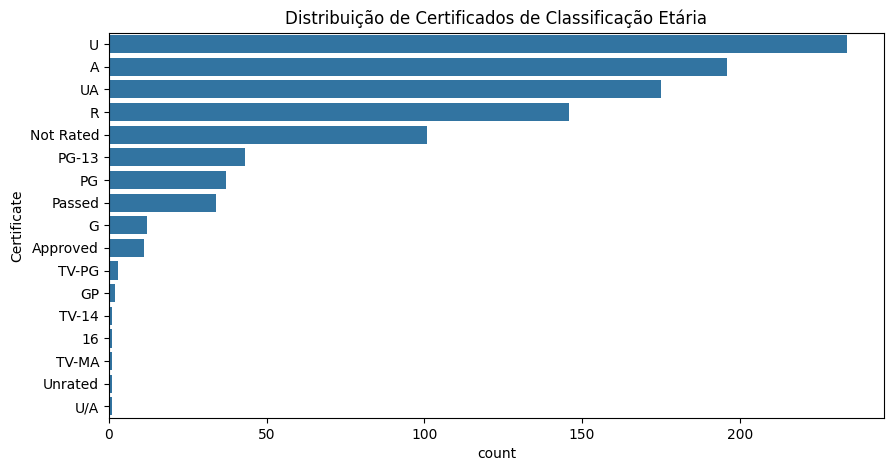

In [26]:
# Distribuição de Certificados de Classificação Etária

plt.figure(figsize=(10, 5))
sns.countplot(y="Certificate", data=df, order=df["Certificate"].value_counts().index)
plt.title("Distribuição de Certificados de Classificação Etária")
plt.show()

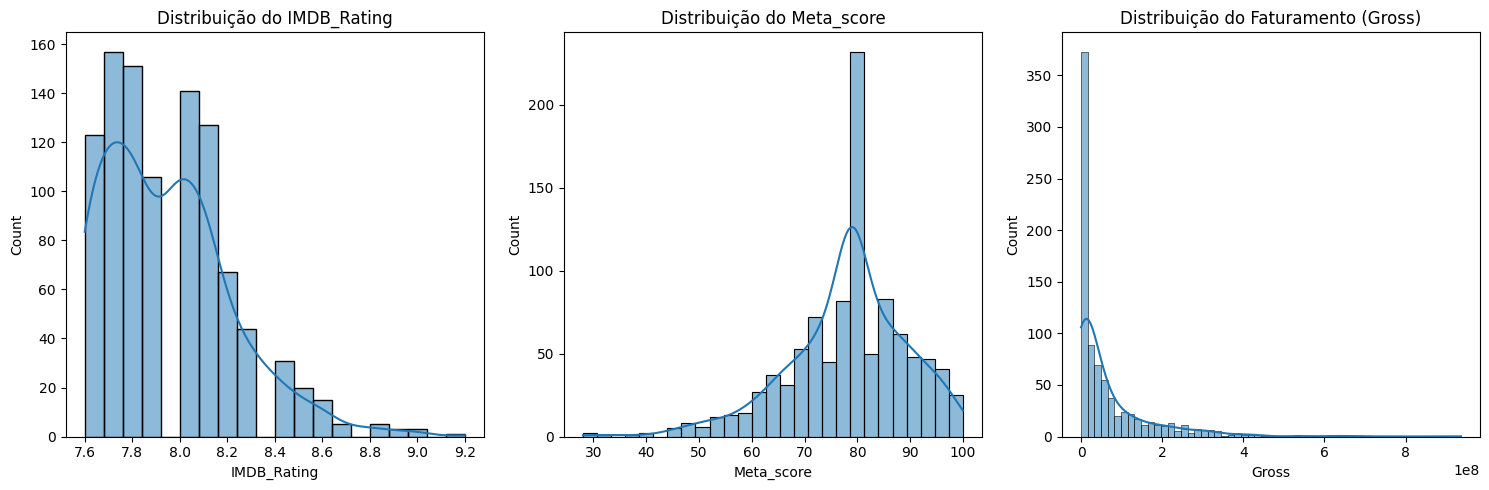

In [27]:
# Análise de Variáveis Numéricas

# Distribuição do IMDB_Rating
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df["IMDB_Rating"], kde=True)
plt.title("Distribuição do IMDB_Rating")

# Distribuição do Meta_score
plt.subplot(1, 3, 2)
sns.histplot(df["Meta_score"], kde=True)
plt.title("Distribuição do Meta_score")

# Distribuição do Faturamento (Gross)
plt.subplot(1, 3, 3)
sns.histplot(df["Gross"], kde=True)
plt.title("Distribuição do Faturamento (Gross)")
plt.tight_layout()
plt.show()

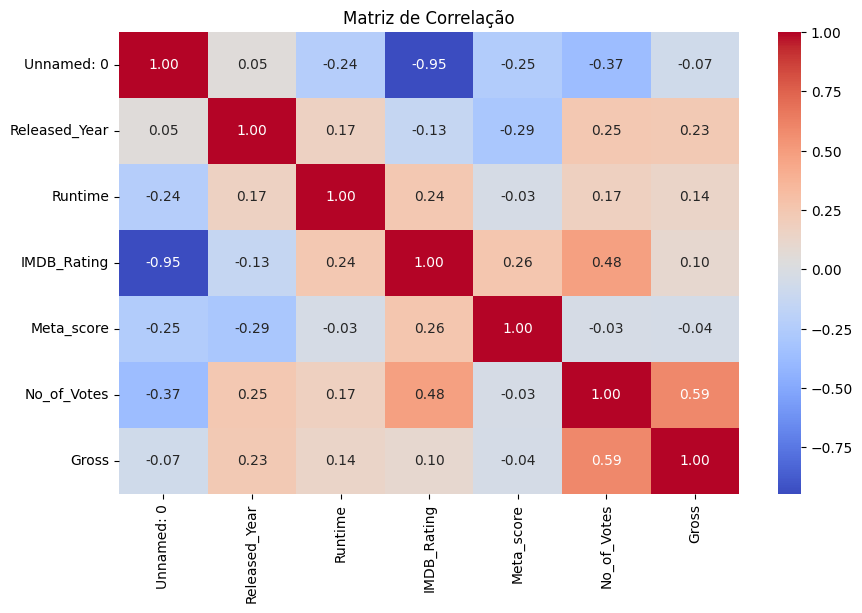

In [28]:
# Análise de Correlação

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

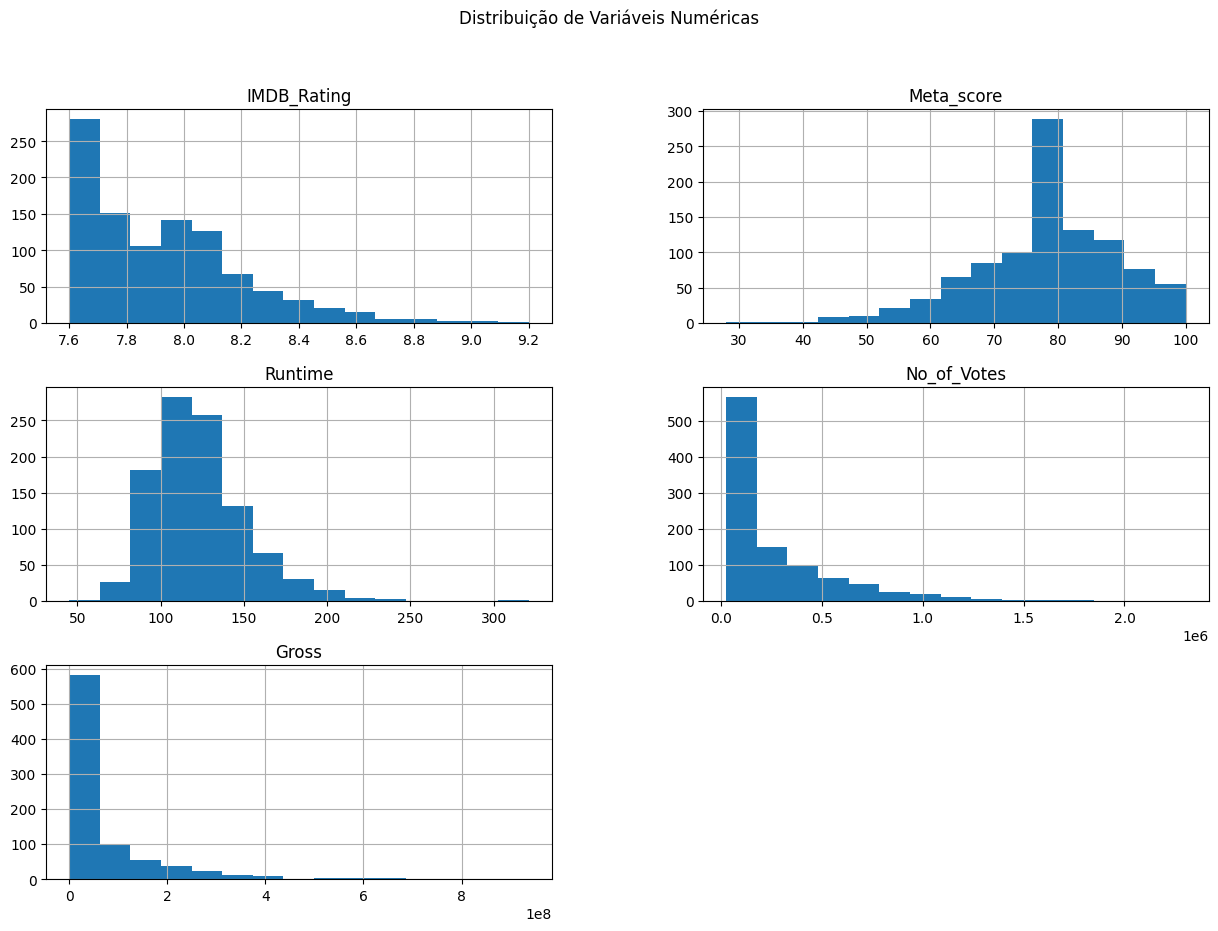

In [29]:
# Análise de distribuição de variáveis
numeric_cols = ['IMDB_Rating', 'Meta_score', 'Runtime', 'No_of_Votes', 'Gross']
df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribuição de Variáveis Numéricas")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Action, Sci-Fi'),
  Text(1, 0, 'Animation, Drama, War'),
  Text(2, 0, 'Western'),
  Text(3, 0, 'Drama, Musical'),
  Text(4, 0, 'Drama, Mystery, War'),
  Text(5, 0, 'Crime, Mystery, Thriller'),
  Text(6, 0, 'Adventure, Mystery, Thriller'),
  Text(7, 0, 'Comedy, Musical, Romance'),
  Text(8, 0, 'Crime, Drama, Music'),
  Text(9, 0, 'Crime, Drama, Sci-Fi')])

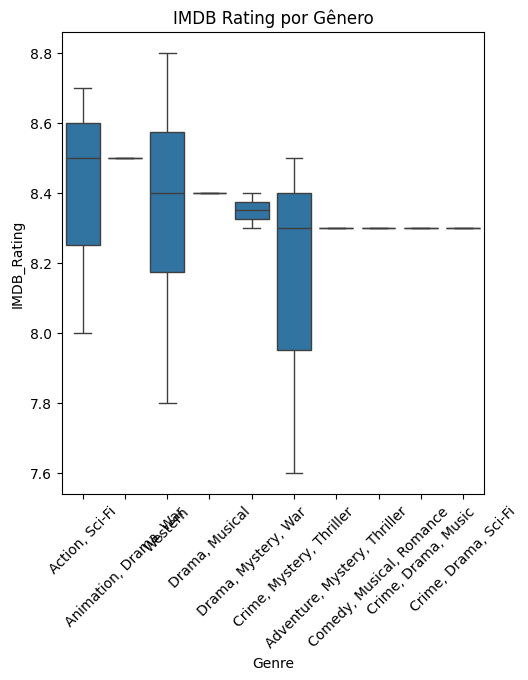

In [30]:
# Gênero e IMDB Rating
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Genre", y="IMDB_Rating", data=df, order=df.groupby("Genre")["IMDB_Rating"].median().sort_values(ascending=False).index[:10])
plt.title("IMDB Rating por Gênero")
plt.xticks(rotation=45)

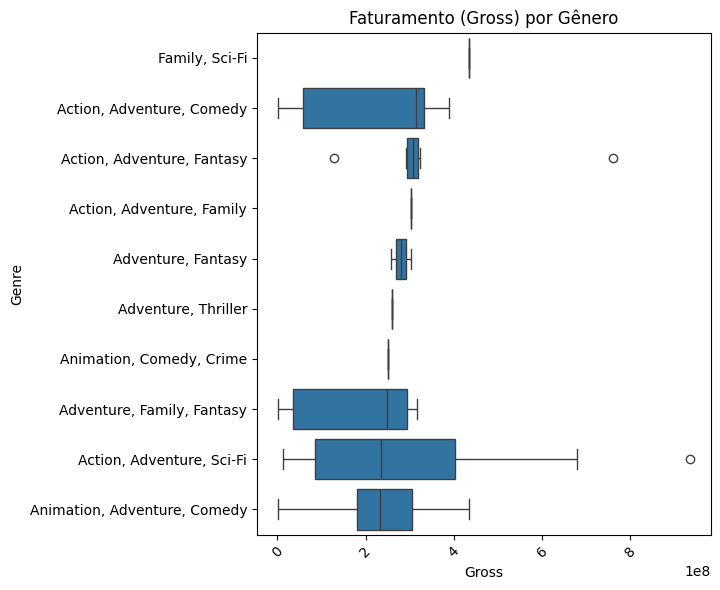

In [31]:
# Faturamento por Gênero
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x="Gross", y="Genre", data=df, order=df.groupby("Genre")["Gross"].median().sort_values(ascending=False).index[:10])
plt.title("Faturamento (Gross) por Gênero")
plt.xticks(rotation=45)
plt.tight_layout()


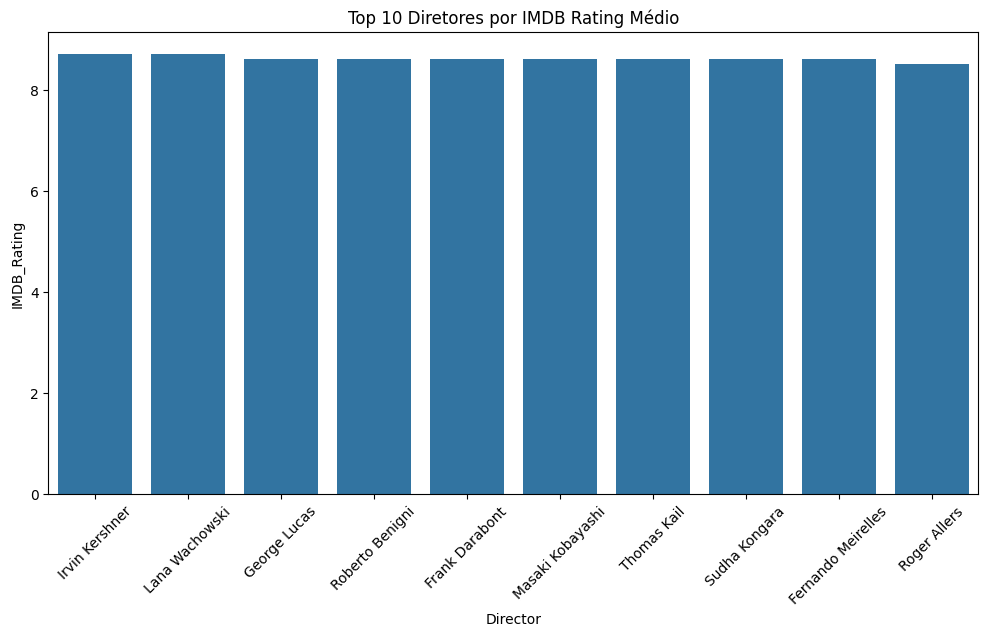

In [32]:
# Relação entre Diretor e IMDB Rating
plt.figure(figsize=(12, 6))
sns.barplot(x="Director", y="IMDB_Rating", data=df, order=df.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).index[:10])
plt.title("Top 10 Diretores por IMDB Rating Médio")
plt.xticks(rotation=45)
plt.show()

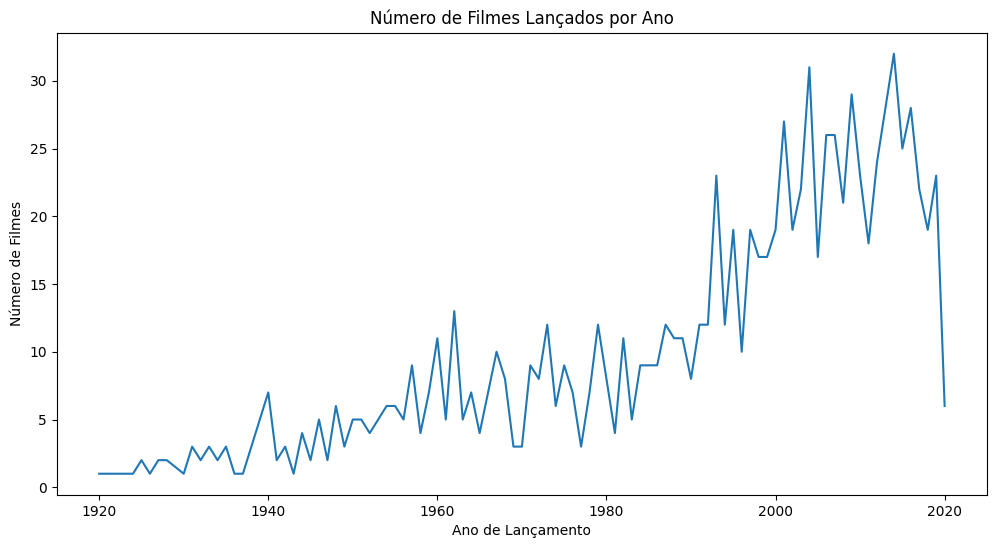

In [33]:
# Análise temporal

# Filmes lançados por ano
plt.figure(figsize=(12, 6))
df['Released_Year'].value_counts().sort_index().plot(kind='line')
plt.title("Número de Filmes Lançados por Ano")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Número de Filmes")
plt.show()

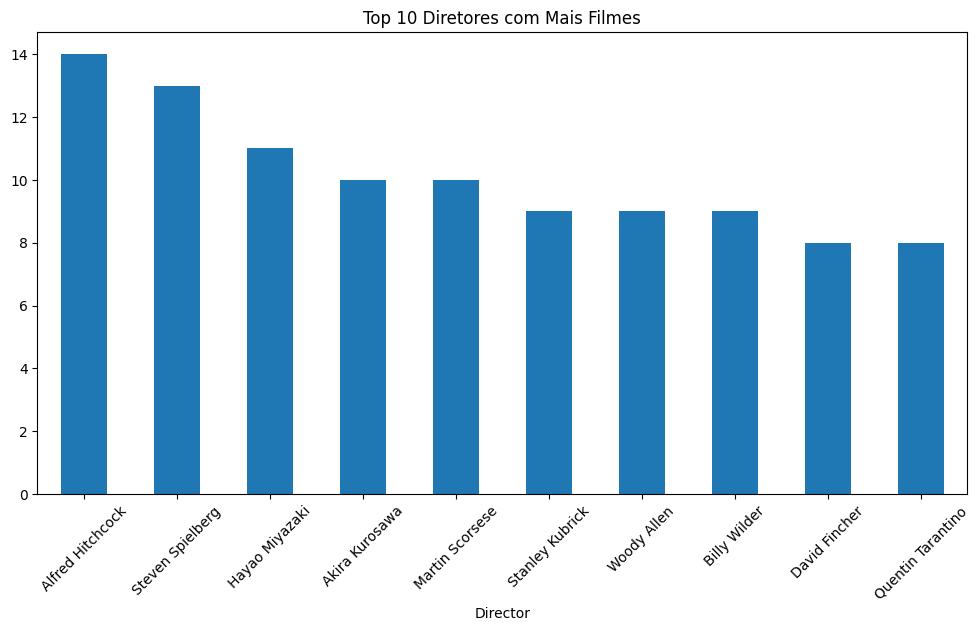

                      IMDB_Rating_Mean  Movie_Count  Meta_score_Mean
Director                                                            
Christopher Nolan                 8.46            8            77.50
Peter Jackson                     8.40            5            79.40
Francis Ford Coppola              8.40            5            85.80
Charles Chaplin                   8.33            6            87.00
Sergio Leone                      8.27            6            77.50
Stanley Kubrick                   8.23            9            84.11
Akira Kurosawa                    8.22           10            85.00
Quentin Tarantino                 8.18            8            78.25
Martin Scorsese                   8.17           10            82.60
Ingmar Bergman                    8.14            7            85.57


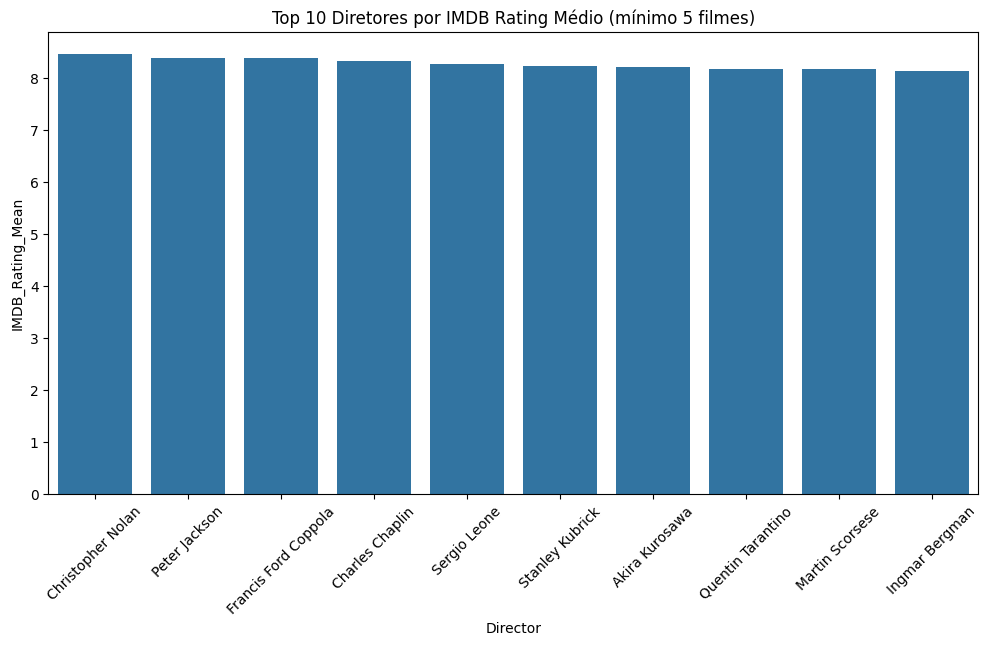

In [34]:
# Análise de diretores e atores

# Top 10 Diretores com Mais Filmes
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar')
plt.title("Top 10 Diretores com Mais Filmes")
plt.xticks(rotation=45)
plt.show()

# Média de rating por diretor 
director_stats = df.groupby('Director').agg({
    'IMDB_Rating': ['mean', 'count'],
    'Meta_score': 'mean'
}).round(2)
director_stats.columns = ['IMDB_Rating_Mean', 'Movie_Count', 'Meta_score_Mean']
director_stats = director_stats[director_stats['Movie_Count'] >= 5].sort_values(by='IMDB_Rating_Mean', ascending=False).head(10)
print(director_stats)
plt.figure(figsize=(12, 6))
sns.barplot(x=director_stats.index, y='IMDB_Rating_Mean', data=director_stats)
plt.title("Top 10 Diretores por IMDB Rating Médio (mínimo 5 filmes)")
plt.xticks(rotation=45)
plt.show()


# Perguntas

In [35]:
# Primeira pergunta: Qual filme você recomendaria para uma pessoa que você não conhece?
recommended_movie = df[(df["IMDB_Rating"] >= df["IMDB_Rating"].quantile(0.95)) & (df["No_of_Votes"] >= df["No_of_Votes"].quantile(0.95)) & (df["Meta_score"] >= df["Meta_score"].quantile(0.95)) & (df["Certificate"].isin(["U", "PG", "A"]))].sort_values(by="IMDB_Rating", ascending=False).iloc[0]
print(f"Filme recomendado: {recommended_movie['Series_Title']} (IMDB Rating: {recommended_movie['IMDB_Rating']}, Ano: {recommended_movie['Released_Year']})")

Filme recomendado: The Godfather (IMDB Rating: 9.2, Ano: 1972.0)


In [36]:
# Segunda pergunta: Quais são os principais fatores que estão relacionados com a alta expectativa de faturamento de um filme?

print("\n--- Fatores Relacionados ao Faturamento (Gross) ---")
print("Com base na análise de correlação e visualizações, os principais fatores relacionados a um alto faturamento são:")
print("- IMDB_Rating e No_of_Votes: Filmes com alta avaliação e grande número de votos tendem a ter maior faturamento, indicando que a popularidade e a qualidade percebida impulsionam a receita.")
print("- Meta_score: Um Meta_score alto também se correlaciona positivamente com o faturamento, reforçando a importância da aclamação da crítica.")
print("- Gênero: Gêneros como 'Action', 'Drama', 'Crime' e 'Adventure' frequentemente aparecem entre os filmes de maior faturamento.")
print("- Diretor e Estrelas: Diretores e atores renomados (Top Diretores/Estrelas por média de faturamento) têm um impacto significativo no potencial de bilheteira de um filme.")
print("- Runtime: Filmes com maior duração (acima de 120 minutos) parecem ter um bom desempenho em termos de faturamento, embora a correlação seja moderada.")



--- Fatores Relacionados ao Faturamento (Gross) ---
Com base na análise de correlação e visualizações, os principais fatores relacionados a um alto faturamento são:
- IMDB_Rating e No_of_Votes: Filmes com alta avaliação e grande número de votos tendem a ter maior faturamento, indicando que a popularidade e a qualidade percebida impulsionam a receita.
- Meta_score: Um Meta_score alto também se correlaciona positivamente com o faturamento, reforçando a importância da aclamação da crítica.
- Gênero: Gêneros como 'Action', 'Drama', 'Crime' e 'Adventure' frequentemente aparecem entre os filmes de maior faturamento.
- Diretor e Estrelas: Diretores e atores renomados (Top Diretores/Estrelas por média de faturamento) têm um impacto significativo no potencial de bilheteira de um filme.
- Runtime: Filmes com maior duração (acima de 120 minutos) parecem ter um bom desempenho em termos de faturamento, embora a correlação seja moderada.


In [37]:
# Terceira pergunta: Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
print("\n--- Análise da Coluna Overview ---")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def process_overview(overview):
    if isinstance(overview,str):
        overview = overview.lower()
        overview = re.sub(r"[^a-z\s]", "", overview)
        tokens = [word for word in overview.split() if word not in stop_words]
        return tokens
    return []
df["Overview_Tokens"] = df["Overview"].apply(process_overview)
all_overview_words = [word for tokens in df["Overview_Tokens"] for word in tokens]
word_counts = Counter(all_overview_words)
print("\nPalavras mais comuns no Overview (após remoção de stopwords):")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")


--- Análise da Coluna Overview ---

Palavras mais comuns no Overview (após remoção de stopwords):
young: 132
man: 110
two: 103
life: 101
world: 78
new: 72
story: 63
war: 61
love: 61
woman: 60
family: 59
one: 57
find: 54
must: 50
finds: 47
help: 45
becomes: 44
boy: 42
friends: 41
girl: 39


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Overview

In [38]:
print("\nInsights da coluna Overview:")
print("- A análise das palavras mais comuns no 'Overview' pode revelar temas recorrentes e o vocabulário típico associado a filmes de sucesso ou a gêneros específicos.")
print("- Palavras como 'life', 'man', 'world', 'young', 'finds' são genéricas, mas termos mais específicos podem indicar o gênero (e.g., 'war' para guerra, 'crime' para crime).")

print("\nInferência de Gênero a partir do Overview:")
print("Sim, é possível inferir o gênero do filme a partir da coluna 'Overview' usando técnicas de Processamento de Linguagem Natural (PLN) e Machine Learning. Isso seria um problema de classificação de texto. Os passos incluiriam:")
print("1. **Vetorização de Texto:** Converter o texto do 'Overview' em representações numéricas (e.g., TF-IDF, Word2Vec, ou embeddings mais avançados como BERT).")
print("2. **Treinamento de um Classificador:** Utilizar algoritmos de classificação (e.g., Naive Bayes, SVM, Random Forest, ou Redes Neurais) com os vetores de texto e os gêneros como rótulos.")
print("3. **Avaliação:** A acurácia do modelo dependeria da clareza e da especificidade das sinopses em relação aos gêneros. Gêneros com descrições mais distintas seriam mais fáceis de prever.")


Insights da coluna Overview:
- A análise das palavras mais comuns no 'Overview' pode revelar temas recorrentes e o vocabulário típico associado a filmes de sucesso ou a gêneros específicos.
- Palavras como 'life', 'man', 'world', 'young', 'finds' são genéricas, mas termos mais específicos podem indicar o gênero (e.g., 'war' para guerra, 'crime' para crime).

Inferência de Gênero a partir do Overview:
Sim, é possível inferir o gênero do filme a partir da coluna 'Overview' usando técnicas de Processamento de Linguagem Natural (PLN) e Machine Learning. Isso seria um problema de classificação de texto. Os passos incluiriam:
1. **Vetorização de Texto:** Converter o texto do 'Overview' em representações numéricas (e.g., TF-IDF, Word2Vec, ou embeddings mais avançados como BERT).
2. **Treinamento de um Classificador:** Utilizar algoritmos de classificação (e.g., Naive Bayes, SVM, Random Forest, ou Redes Neurais) com os vetores de texto e os gêneros como rótulos.
3. **Avaliação:** A acurácia d

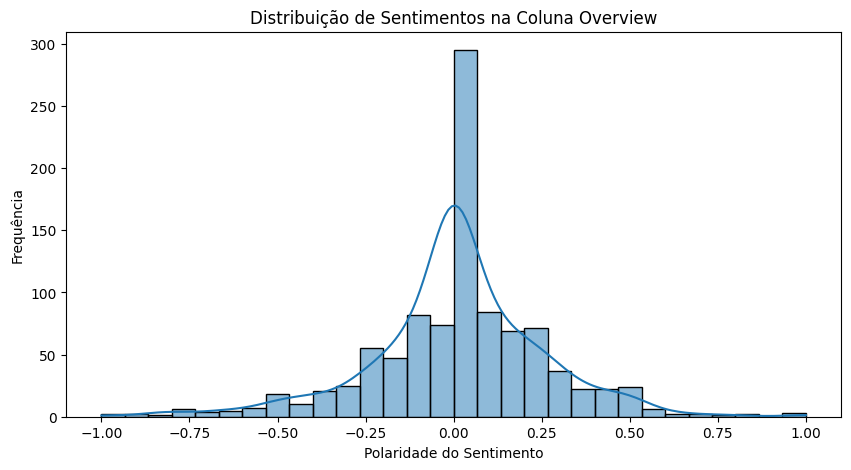

In [39]:
# Análise de sentimentos simples na coluna Overview
from textblob import TextBlob
def get_sentiment(overview):
    if isinstance(overview, str):
        analysis = TextBlob(overview)
        return analysis.sentiment.polarity
    return 0
df['Sentiment'] = df['Overview'].apply(get_sentiment)
plt.figure(figsize=(10, 5))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title("Distribuição de Sentimentos na Coluna Overview")
plt.xlabel("Polaridade do Sentimento")
plt.ylabel("Frequência")
plt.show()

# Previsão de Nota do IMDB

In [40]:
# importando dependências para o treinamento do modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # Troque para Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import LabelEncoder

In [41]:


le_genre = LabelEncoder()
df["Genre_encoded"] = le_genre.fit_transform(df["Genre"])
df["Certificate"] = df["Certificate"].astype(str)
le_certificate = LabelEncoder()
df["Certificate_encoded"] = le_certificate.fit_transform(df["Certificate"])

features = ["Runtime", "Meta_score", "No_of_Votes", "Gross", "Released_Year", "Genre_encoded", "Certificate_encoded"]
target = "IMDB_Rating"

X = df[features]
y = df[target]

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Avaliação do Modelo:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}") 

Avaliação do Modelo:
MAE: 0.15536910419822988
RMSE: 0.19653508491410945


In [42]:
print("Tipo de Problema: Regressão, pois estamos prevendo uma variável contínua (IMDB_Rating).")
print("Variáveis Utilizadas como Features: Runtime, Meta_score, No_of_Votes, Gross, Released_Year, Genre (codificado), Certificate (codificado).")
print("Modelo Escolhido: Gradient Boosting Regressor, adequado para problemas de regressão com boa capacidade de generalização.")
print("Prós: Boa performance em dados tabulares, capacidade de capturar relações não lineares.")
print("Contras: Pode ser sensível a hiperparâmetros, requer mais tempo de treinamento comparado a modelos mais simples.")
print("Qual a medida de performance do modelo foi escolhida? MAE e RMSE, que são métricas comuns para avaliar a precisão de modelos de regressão.")


Tipo de Problema: Regressão, pois estamos prevendo uma variável contínua (IMDB_Rating).
Variáveis Utilizadas como Features: Runtime, Meta_score, No_of_Votes, Gross, Released_Year, Genre (codificado), Certificate (codificado).
Modelo Escolhido: Gradient Boosting Regressor, adequado para problemas de regressão com boa capacidade de generalização.
Prós: Boa performance em dados tabulares, capacidade de capturar relações não lineares.
Contras: Pode ser sensível a hiperparâmetros, requer mais tempo de treinamento comparado a modelos mais simples.
Qual a medida de performance do modelo foi escolhida? MAE e RMSE, que são métricas comuns para avaliar a precisão de modelos de regressão.


# Previsão para o filme exemplo:


In [43]:
example_movie_data = {
    "Series_Title": "The Shawshank Redemption",
    "Released_Year": 1994,
    "Certificate": "A",
    "Runtime": "142 min",
    "Genre": "Drama",
    "Overview": "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",
    "Meta_score": 80,
    "Director": "Frank Darabont",
    "Star1": "Tim Robbins",
    "Star2": "Morgan Freeman",
    "Star3": "Bob Gunton",
    "Star4": "William Sadler",
    "No_of_Votes": 2343110,
    "Gross": "28,341,469"
}

example_df = pd.DataFrame([example_movie_data])
example_df["Runtime"] = example_df["Runtime"].apply(lambda x: int(re.findall(r"\d+", x)[0]))
example_df["Gross"] = example_df["Gross"].str.replace(",", "").astype(float)
example_df["Released_Year"] = pd.to_numeric(example_df["Released_Year"], errors="coerce")
example_df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True) 


example_df["Genre_encoded"] = le_genre.transform(example_df["Genre"])
example_df["Certificate_encoded"] = le_certificate.transform(example_df["Certificate"].astype(str))


X_example = example_df[features]

predicted_imdb_rating = model.predict(X_example)[0]

print("\n--- Previsão da Nota do IMDB para o Filme Exemplo ---")
print(f"A nota do IMDB prevista para '{example_movie_data['Series_Title']}' é: {predicted_imdb_rating:.2f}")



--- Previsão da Nota do IMDB para o Filme Exemplo ---
A nota do IMDB prevista para 'The Shawshank Redemption' é: 8.89


C:\Users\Maria\AppData\Local\Temp\ipykernel_5892\3072092575.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  example_df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True)
c:\Users\Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


# Salvando o modelo

In [46]:
import pickle

model_filename = "modelo_imdb.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"\nModelo salvo como {model_filename}")


Modelo salvo como modelo_imdb.pkl
